<a href="https://colab.research.google.com/github/2025Sauko/Analisis-de-Datos/blob/main/RL2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    x   y
0   1   5
1   2  10
2   3  10
3   4  15
4   5  14
5   6  15
6   7  19
7   8  18
8   9  25
9  10  23

 [ 5 10 10 15 14 15 19 18 25 23]

 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

 Resultado de reshape

 [[ 5]
 [10]
 [10]
 [15]
 [14]
 [15]
 [19]
 [18]
 [25]
 [23]]

 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

 Coeficientes originales

 [[1.93939394]]

 [4.73333333]

Coeficientes después de aplicar flatten
m = [1.93939394]
b = [4.73333333]

           x         y
x  1.000000  0.957586
y  0.957586  1.000000


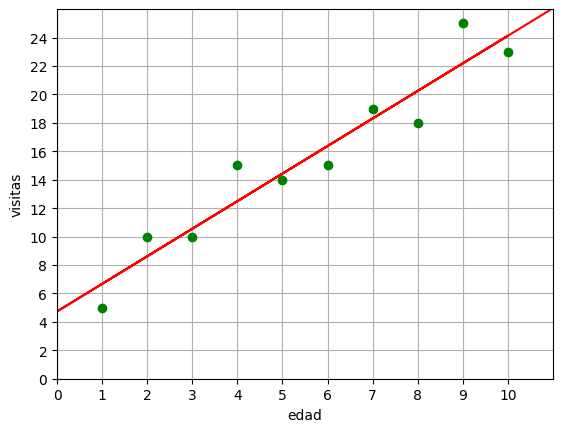

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Permite aplicar modelos de aprendizaje automaticco
import numpy as np

# Importar datos
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",") #ruta del archivo
print(df)

#  Extraer la columna de salida (todas las filas, última columna)
visitas = df.values[:, -1] #Indica la ultima
print('\n', visitas)

# Extraer las variables de entrada (todas las filas, todas las columnas menos
# la última)
edad = df.values[:, :-1]
print('\n', edad)
edad = edad.reshape(-1,1)
visitas=visitas.reshape(-1,1)
print('\n Resultado de reshape')
print('\n',visitas)
print('\n',edad)

#Ajustar una línea a los puntos
model=LinearRegression()
model.fit(edad, visitas)

# m = 1.7867224, b = -16.51923513
print('\n Coeficientes originales')
print('\n',model.coef_)
print('\n',model.intercept_)
m=model.coef_.flatten()
b=model.intercept_.flatten()

print('\nCoeficientes después de aplicar flatten')
print("m = {0}".format(m))
print("b = {0}".format(b))

# Gráfico
plt.grid(True)
plt.yticks(range(0,26,2))
plt.xticks(range(0,11,1))
plt.ylim(0, 26)
plt.xlim(0, 11)
plt.xlabel('edad')
plt.ylabel('visitas')
plt.plot(edad, visitas, 'o', color='green') # gráfico de dispersión
edad2 = df['x'].to_numpy()
edad3 = np.append(edad2, [0, 12])
plt.plot(edad3, m*edad3+b, color='red') # línea
correlacion=df.corr(method='pearson')
print('\n',correlacion)
plt.savefig('diagrama-dispersion5.png')
plt.show()

In [ ]:
# Datos
visitas = np.array([5, 10, 10, 15, 14, 15, 19, 18, 25, 23])
edad = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
datos = pd.DataFrame({'visitas': visitas, 'edad': edad},
                     columns=['visitas', 'edad']).itertuples()

# Probar con una línea dada
m = 1.93939
b= 4.73333

# Calcular los residuos
error=0
print ('Residuo para cada punto:')
for d in datos:
  visitas_reales = d.visitas
  visitas_predichas = m*d.edad + b
  residuo = visitas_reales - visitas_predichas
  print (residuo)
  residuo = residuo**2
  error=error+residuo
rms=(error/len(edad))**0.5
print ('\nError cuadrático medio:', rms)

Residuo para cada punto:
-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973

Error cuadrático medio: 1.6762150728501402
